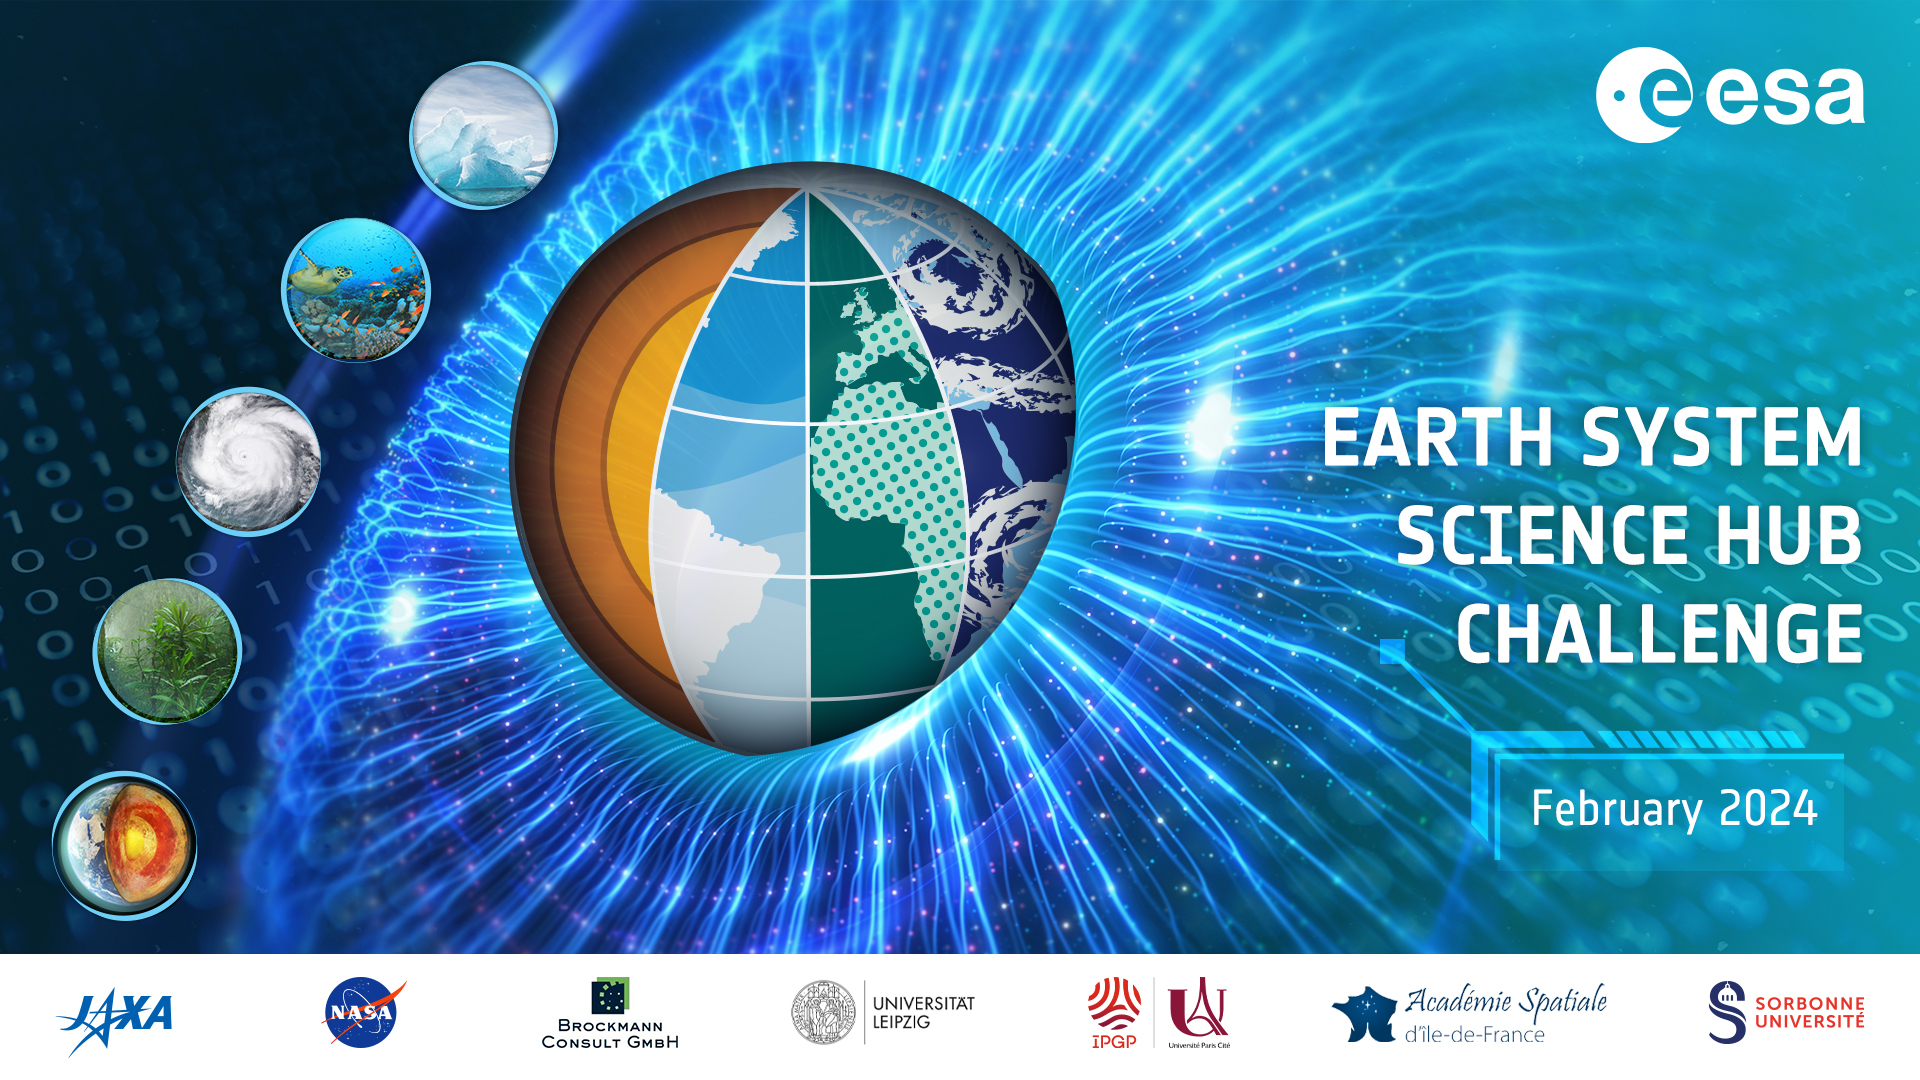

<div class="alert alert-info" role="alert">This concise notebook demonstrates guidelines for submission of your projects developed under the <b>Earth System Science Open Challenge!</b><br>
Please use this notebook as a template for delivering your workflow with the code you used to produce the results! 
<br> 
For more information, refer to Open Challenge website: <a href="https://eo4society.esa.int/event/sciencehubchallengefeb2024/" target="_blank">https://eo4society.esa.int/event/sciencehubchallengefeb2024/ </a> <br> 
</div>

# PART 1: SUMMARY

<hr>

# <a id='section1'></a><span style='color:DarkCyan'> 1. Title </center> </span> 
**Author(s):**  Selviga Sinnathamby, Natacha Kaminski, Ellie Zoghbi <br> 
**Group name:**  RMSH <br> 
**Challenge:** Challenge 1 : Detection of extreme air pollution episodes in Northern India and Pakistan <br> 

**Submission date:** 2024/03/01<br> 
**Remember to RENAME your notebook with your team name (or full name in case of individual project) and challenge number!**
<br> 
<span style='color:Red'>Please note the submission deadline is **1st March 2024!** </span> 

# <a id='section2'></a><span style='color:DarkCyan'> 2. Description </center> </span>

In this challenge, we want to identify the days on which severe air pollution episodes occur in northern India and Pakistan, using the percentile technique. To do this, we study the evolution of carbon monoxide (CO) concentrations measured by TROPOMI, an atmospheric sounding instrument on board Sentinel 5P, widely used to study air quality from space. 
CO is a trace gas, naturally present in the atmosphere and mainly emitted by incomplete combustion processes (anthropogenic activities such as heating, cooking, industrial activities or vegetation fires). This gas is often studied in the field of air quality, as it is a good tracer of pollution due to its long lifespan (from a few weeks to a few months, depending on the season and latitude), which enables it to be transported over long distances. 

Once we've identified the days on which we have a pollution episode, we choose one to explain its formation and evolution over time, using meteorological data (horizontal winds at 100m from the ERA5 reanalysis) and data that identify sources of CO (Active Fires from VIIRS-SNPP).

In this study, we focus on 3 densely populated cities in the region of interest: Lahore in Pakistan, New Delhi and Lucknow in India. We are interested in the year 2023, but the same study can be carried out for earlier years. 



# <a id='section3'></a><span style='color:DarkCyan'> 3. Table of Contents </center> </span> 

 1. [Title](#section1)
 2. [Description](#section2)
 3. [Table of Contents](#section3)
 4. [References](#section4)
 5. [Key Conclusions](#section5)
 6. [Societal Context](#section6)
 7. [Import libraries](#section7)
 8. [Access dataset](#section8)
 9. [Analysis cells](#section9)


# <a id='section4'></a><span style='color:DarkCyan'> 4. References </center> </span>

### Papers
Sembhi et al. (2020). Post-monsoon air quality degradation across Northern India: assessing the impact of policy-related shifts in timing and amount of crop residue burnt. Environ. Res. Lett. 15 104067. DOI 10.1088/1748-9326/aba714

V.P. Kanawade et al. (2019). What caused severe air pollution episode of November 2016 in New Delhi? Atmospheric Environment, Vol 222, 117125. DOI 10.1016/j.atmosenv.2019.117125

### Websites 
World Health Organization. (n.d.). Ambient (outdoor) air quality and health. WHO. Retrieved from https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health. Accessed February 29, 2024. 

### Press articles 
Carole Dieterich. (2023, November 18). New Delhi's air pollution crisis is poisoning millions of children every winter. Le Monde. https://www.lemonde.fr/en/environment/article/2023/11/18/new-delhi-s-air-pollution-crisis-is-poisoning-millions-of-children-every-winter_6265386_114.html.

Kumar Kunal. (2022, June 3). Delhi's new normal: Air pollution not just in winter. India Today. https://www.indiatoday.in/diu/story/delhi-new-normal-air-pollution-not-just-in-winter-1958072-2022-06-03.


# <a id='section5'></a><span style='color:DarkCyan'> 5. Key Conclusions </center> </span>

- Severe air pollution episodes can be monitored with satellite observations. 
- Using multiple variables (fires and winds) can help us to describe the formation and the evolution of a severe air pollution episode. 
- IGP experienced extreme CO pollution episodes in October/November 2023 due to the burning of agricultural waste by farmers but also due to stable meteorological conditions (low wind speed), favoring its accumulation along the Himalayas.  

# <a id='section6'></a><span style='color:DarkCyan'> 6. Societal Context </center> </span>

Air pollution is a real concern for human health. The consequences of poor air quality include respiratory issues, cardiovascular diseases, cancers, etc. According to WHO :
- « outdoor air pollution is estimated to have caused 4.2 million premature deaths worldwide in 2019 » 
- « Some 89% of those premature deaths occurred in low- and middle-income countries, and the greatest number in the WHO South-East Asia and Western Pacific Regions »

The region along the Himalayas in Northern India and Pakistan, also know as the Indo-Gangetic Plain (IGP), is a highly populated region of intense agricultural and industrial activities. The region frequently experiences severe air pollution episodes, putting the local population at risk, as witnessed by the articles published in the national and international press [Le Monde, India Today]. Understanding the formation of pollution episodes in this region is vital to help the government establish laws limiting pollutant emissions, and thus enable the local population to live in a healthy environment. 


# PART 2: SCIENTIFIC EXPLOITATION AND ANALYSIS

<hr>

# <a id='section7'></a><span style='color:DarkCyan'> 7. Import Libraries </center> </span>

**This notebook runs with the python environment `deepesdl-xcube-1.1.2`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store
import IPython.display
import os
import pandas as pd
import pytz
import xarray as xr
import numpy as np
from scipy.constants import Avogadro


# For visualisation
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.mpl.ticker as cticker
from IPython.display import JSON
import shapely.geometry

# <a id='section8'></a><span style='color:DarkCyan'> 8. Data sources </center> </span>


| Datacube name | Variable name| Description  | Reference* | Region | Time range | Resolution | 
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| S5PL2 | CO | <a href="https://docs.sentinel-hub.com/api/latest/data/" target="_blank">metadata description</a> | <a href="https://sentinels.copernicus.eu/web/sentinel/data-products" target="_blank">link to source</a> | IGP | 2023-01-01 to 2023-12-31 | 0.025° | <br>
| VNP14IMGTDL | VIIRS Active Fire product from S-NPP | <a href="https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/viirs-i-band-375-m-active-fire-data" target="_blank">metadata description</a> | <a href="https://firms.modaps.eosdis.nasa.gov/download/" target="_blank">link to source</a> | IGP | 2023-10-01 to 2023-11-30 | 375m | <br>
| ERA5 hourly data on single levels | u100, v100 | <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview" target="_blank">metadata description</a> | <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview" target="_blank">link to source</a> | IGP | 2023-10-01 to 2023-11-30 | 0.25° | <br>


In [2]:
# Defintion of areas of interest
# For the Indo-Gangetic Plain
x1 = 65 
y1 = 23  
x2 = 85  
y2 = 35  
bbox = x1, y1, x2, y2
latlim_area, lonlim_area = [y1, y2], [x1, x2]

# For the cities 
lon_newdelhi = 77.216
lat_newdelhi = 28.644
bbox_newdelhi = lon_newdelhi-0.4, lat_newdelhi-0.4, lon_newdelhi+0.4, lat_newdelhi+0.4
lon_lahore = 74.356
lat_lahore = 31.502
bbox_lahore = lon_lahore-0.4, lat_lahore-0.4, lon_lahore+0.4, lat_lahore+0.4
lon_lucknow = 80.946
lat_lucknow = 26.836
bbox_lucknow = lon_lucknow-0.4, lat_lucknow-0.4, lon_lucknow+0.4, lat_lucknow+0.4

Let's plot the region and cities of interest.

In [3]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

In [5]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox_lahore).__geo_interface__)

<IPython.display.GeoJSON object>

In [4]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox_newdelhi).__geo_interface__)

<IPython.display.GeoJSON object>

In [6]:
IPython.display.GeoJSON(shapely.geometry.box(*bbox_lucknow).__geo_interface__)

<IPython.display.GeoJSON object>

In [7]:
# Get TROPOMI data from Sentinel Hub
os.environ["SH_CLIENT_ID"] =  "ce2a40c7-d06d-4a15-84bb-18c8dc95ad13"  
os.environ["SH_CLIENT_SECRET"] = "CFXn88vrxb6yKlT3fqnU1oApk2bqdCEG"
store = new_data_store('sentinelhub', client_id=os.environ["SH_CLIENT_ID"], client_secret=os.environ["SH_CLIENT_SECRET"], api_url='https://creodias.sentinel-hub.com', num_retries=400)

# Load datasets for each of the area of cities 
dataset = store.open_data('S5PL2', 
                          variable_names=['CO'],
                          bbox=bbox,
                          spatial_res=0.025,
                          time_range=['2023-10-01','2023-11-30'],
                          time_period='1D')

dataset_newdelhi = store.open_data('S5PL2', 
                          variable_names=['CO'],
                          bbox=bbox_newdelhi,
                          spatial_res=0.025,
                          time_range=['2023-01-01','2023-12-31'],
                          time_period='1D')

dataset_lahore = store.open_data('S5PL2', 
                          variable_names=['CO'],
                          bbox=bbox_lahore,
                          spatial_res=0.025,
                          time_range=['2023-01-01','2023-12-31'],
                          time_period='1D')

dataset_lucknow = store.open_data('S5PL2', 
                          variable_names=['CO'],
                          bbox=bbox_lucknow,
                          spatial_res=0.025,
                          time_range=['2023-01-01','2023-12-31'],
                          time_period='1D')
dataset

<xarray.Dataset>
Dimensions:    (time: 61, lat: 480, lon: 800, bnds: 2)
Coordinates:
  * lat        (lat) float64 34.99 34.96 34.94 34.91 ... 23.09 23.06 23.04 23.01
  * lon        (lon) float64 65.01 65.04 65.06 65.09 ... 84.91 84.94 84.96 84.99
  * time       (time) datetime64[ns] 2023-10-01T12:00:00 ... 2023-11-30T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(61, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    CO         (time, lat, lon) float32 dask.array<chunksize=(1, 480, 800), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2024-03-02T20:05:50.050010
    time_coverage_start:       2023-10-01T00:00:00+00:00
    time_coverage_end:         2023-12-01T00:00:00+00:00
    time_coverage_duration:    P61DT0H0M0S
    time_coverage_resolution:  P1DT0H0M0S
    geospatial_lon_min:        65
    geospatial_lat_min:        23
    geospatial_lon_max:        85.0
    geospatial_lat_max:        35.0

In [8]:
# Get ERA5 winds data

S3_USER_STORAGE_KEY = os.environ["S3_USER_STORAGE_KEY"]
S3_USER_STORAGE_SECRET = os.environ["S3_USER_STORAGE_SECRET"]
S3_USER_STORAGE_BUCKET = os.environ["endpoint"]


Please run either of these cells below.

In [ ]:
# Dowload ERA5 data from CDS
# store_cds = new_data_store('cds')
# dataset_winds = store.open_data('reanalysis-era5-single-levels:reanalysis', 
#                               variable_names=['100m_u_component_of_wind', '100m_v_component_of_wind'], 
#                               bbox=bbox, 
#                               spatial_res=0.25, 
#                               time_range=['2023-10-01', '2023-11-30'])
# dataset_winds

In [9]:
# Or get the ERA5 data from the commun storage
dataset_name = 'selviga/ERA5_uvwinds_20231011_hourly_025x025.zarr'
user_store = new_data_store("s3", max_depth=3, root=S3_USER_STORAGE_BUCKET,storage_options=dict(anon=False, key=S3_USER_STORAGE_KEY,secret=S3_USER_STORAGE_SECRET))
dataset_winds = user_store.open_data(dataset_name)
dataset_winds

<xarray.Dataset>
Dimensions:  (lat: 48, lon: 80, time: 1464)
Coordinates:
  * lat      (lat) float32 34.88 34.62 34.38 34.12 ... 23.88 23.62 23.38 23.12
  * lon      (lon) float32 65.12 65.38 65.62 65.88 ... 84.12 84.38 84.62 84.88
  * time     (time) datetime64[ns] 2023-10-01 ... 2023-11-30T23:00:00
Data variables:
    u100     (time, lat, lon) float32 dask.array<chunksize=(366, 24, 40), meta=np.ndarray>
    v100     (time, lat, lon) float32 dask.array<chunksize=(366, 24, 40), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-25 18:00:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
# Load VIIRS/SNPP Fire detection data from FIRMS
df_fires_oct = pd.read_csv('/extra/team RMSH/FIRMS_FIRENRT_INDIA+PAKISTAN_202310.csv')
df_fires_nov =  pd.read_csv('/extra/team RMSH/FIRMS_FIRENRT_INDIA+PAKISTAN_202311.csv')
df_fires = pd.concat([df_fires_oct, df_fires_nov])
df_fires

/tmp/ipykernel_98/3560497497.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fires_nov =  pd.read_csv('/extra/team RMSH/FIRMS_FIRENRT_INDIA+PAKISTAN_202311.csv')


,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,0,27.71131,96.25545,329.44,0.39,0.36,2023-10-01,640,1,VIIRS,n,2.0NRT,288.88,1.12,D
1,1,27.75080,96.31180,339.58,0.39,0.36,2023-10-01,640,1,VIIRS,n,2.0NRT,295.18,4.27,D
2,2,27.74811,96.31633,344.11,0.39,0.36,2023-10-01,640,1,VIIRS,n,2.0NRT,294.25,4.56,D
3,3,27.74482,96.31697,328.71,0.39,0.36,2023-10-01,640,1,VIIRS,n,2.0NRT,293.53,4.56,D
4,4,27.73305,96.26329,336.29,0.39,0.36,2023-10-01,640,1,VIIRS,n,2.0NRT,296.11,21.24,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147514,13635,24.89348,67.00259,299.41,0.38,0.36,2023-11-30,2112,N,VIIRS,n,2.0NRT,288.38,0.26,N
147515,13636,24.89135,66.99439,301.35,0.38,0.36,2023-11-30,2112,N,VIIRS,n,2.0NRT,290.77,0.49,N
147516,13637,24.78320,67.35935,304.96,0.38,0.36,2023-11-30,2112,N,VIIRS,n,2.0NRT,290.52,0.79,N
147517,13638,24.43405,68.49235,321.62,0.40,0.37,2023-11-30,2112,N,VIIRS,n,2.0NRT,290.06,1.13,N


In [11]:
# We select day data from VIIRS/SNPP (at 1:30 p.m.) of high or neutral confidence level
df_viirs = df_fires[df_fires['instrument'] == 'VIIRS']
df_viirs = df_viirs[df_viirs['satellite'] =='N']
df_viirs = df_viirs[(df_viirs['confidence'] == 'n') | (df_viirs['confidence'] == 'h')]
df_viirs = df_viirs[df_viirs['daynight']=='D'] 

# <a id='section9'></a><span style='color:DarkCyan'> 9. Analysis cells </center> </span>


## Carbon monoxide time series from TROPOMI/Sentinel-5P measurements

We are computing daily averages of CO concentrations of each cities, for 2023.

In [18]:
timeseries_lahore = dataset_lahore.mean(dim=('lon', 'lat'))*Avogadro*1e-4
timeseries_newdelhi= dataset_newdelhi.mean(dim=('lon', 'lat'))*Avogadro*1e-4
timeseries_lucknow = dataset_lucknow.mean(dim=('lon', 'lat'))*Avogadro*1e-4

Text(0, 0.5, 'CO [molec/cm²]')

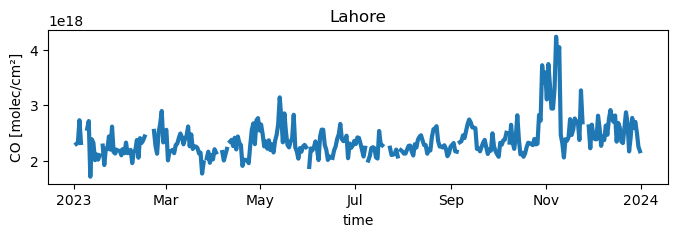

In [63]:
timeseries_lahore.CO.plot(x='time', figsize=(8, 2), color='tab:blue', lw=3)
plt.title('Lahore')
plt.ylabel('CO [molec/cm²]')

Text(0, 0.5, 'CO [molec/cm²]')

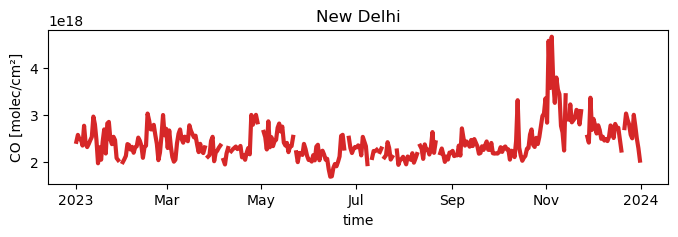

In [62]:
timeseries_newdelhi.CO.plot(x='time', figsize=(8, 2), color='tab:red', lw=3)
plt.title('New Delhi')
plt.ylabel('CO [molec/cm²]')

Text(0, 0.5, 'CO [molec/cm²]')

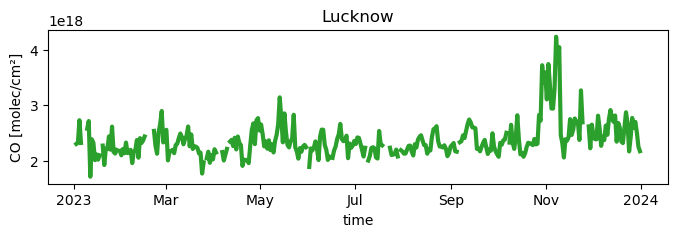

In [64]:
timeseries_lucknow.CO.plot(x='time', figsize=(8, 2), color='tab:green', lw=3)
plt.title('Lucknow')
plt.ylabel('CO [molec/cm²]')

## Detection of extreme air pollution events (percentile technique)

We apply the percentile technique to determine the days where we have extreme air pollution episodes in each city. The percentile method is a strategy utilized to recognize outliers or extreme values based upon a defined percent limit. It involves calculating the threshold values based on percentiles. The steps are to first determine the percentage threshold (like 90%, 95%, and 99% in our case), then calculate the threshold values, and then identify values above this threshold.

We define a python function to get the values of CO time series above 90%, 95% and 99% and their corresponding dates.  

In [36]:
def percentile_method(timeseries) :
    """
    Get the values of the time series above 90%, 95% and 99%.
    Arguments :
        timeseries: DataArray
    Return : 
        df : timeseries without nans as a DataFrame
        y_90 : value of CO for percentile=90%
        ts_90: series containing values of timeseries above 90%
        y_95 : value of CO for percentile=95%
        ts_95: series containing values of timeseries above 95%
        y_99 : value of CO for percentile=99%
        ts_99: series containing values of timeseries above 99%
    """
    time = timeseries.time.values
    data = timeseries.CO.values
    
    # We need to remove nan values from time series
    new_data = data[~np.isnan(data)]
    new_time = time[~np.isnan(data)]
    
    df = pd.Series(new_data, index=new_time).to_frame()
    
    # We use the percentile function from numpy to get the threshold value for 90%, 95% and 99%
    y_90=np.percentile(new_data, 90)
    y_95=np.percentile(new_data, 95)
    y_99=np.percentile(new_data, 99)
    
    # values that exceed the threshold value
    extremes_90 = new_data[new_data > y_90]
    extremes_95 = new_data[new_data > y_95]
    extremes_99 = new_data[new_data > y_99]
    new_time_extreme_90 = new_time[new_data > y_90]
    new_time_extreme_95 = new_time[new_data > y_95]
    new_time_extreme_99 = new_time[new_data > y_99]
    
    ts_90 = pd.Series(extremes_90, index=new_time_extreme_90)
    ts_95 = pd.Series(extremes_95, index=new_time_extreme_95)
    ts_99 = pd.Series(extremes_99, index=new_time_extreme_99)
    
    return df, y_90, ts_90, y_95, ts_95, y_99, ts_99
    

In [37]:
# We apply the function on the time series of each city
df_lahore, y_lahore90, ts_lahore90, y_lahore95, ts_lahore95, y_lahore99, ts_lahore99 = percentile_method(timeseries_lahore)
df_newdelhi, y_newdelhi90, ts_newdelhi90, y_newdelhi95, ts_newdelhi95, y_newdelhi99, ts_newdelhi99 = percentile_method(timeseries_newdelhi)
df_lucknow, y_lucknow90, ts_lucknow90, y_lucknow95, ts_lucknow95, y_lucknow99, ts_lucknow99 = percentile_method(timeseries_lucknow)

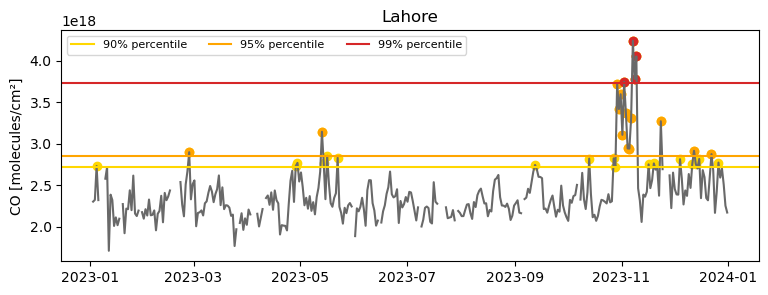

In [40]:
# We plot the results for each city
fig = plt.figure(figsize=(9,3))
ax = plt.axes()
ax.plot(timeseries_lahore.time, timeseries_lahore.CO, 'dimgray')

ax.axhline(y=y_lahore90, color='gold', label='90% percentile')
ax.scatter(ts_lahore90.index, ts_lahore90, color='gold')

ax.axhline(y=y_lahore95, color='orange', label='95% percentile')
ax.scatter(ts_lahore95.index, ts_lahore95, color='orange')

ax.axhline(y=y_lahore99, color='tab:red', label='99% percentile')
ax.scatter(ts_lahore99.index, ts_lahore99, color='tab:red')
ax.set_ylabel('CO [molecules/cm²]')
ax.set_title('Lahore')
ax.legend(loc='upper left', fontsize=8, ncol=3)
plt.show()

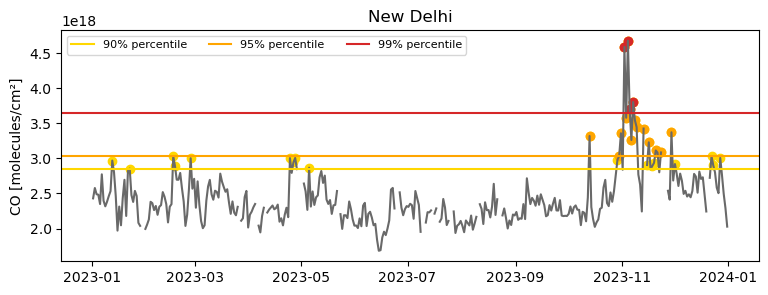

In [41]:
fig = plt.figure(figsize=(9,3))
ax = plt.axes()
ax.plot(timeseries_newdelhi.time, timeseries_newdelhi.CO, 'dimgray')

ax.axhline(y=y_newdelhi90, color='gold', label='90% percentile')
ax.scatter(ts_newdelhi90.index, ts_newdelhi90, color='gold')

ax.axhline(y=y_newdelhi95, color='orange', label='95% percentile')
ax.scatter(ts_newdelhi95.index, ts_newdelhi95, color='orange')

ax.axhline(y=y_newdelhi99, color='tab:red', label='99% percentile')
ax.scatter(ts_newdelhi99.index, ts_newdelhi99, color='tab:red')
ax.set_ylabel('CO [molecules/cm²]')
ax.set_title('New Delhi')
ax.legend(loc='upper left', fontsize=8, ncol=3)
plt.show()

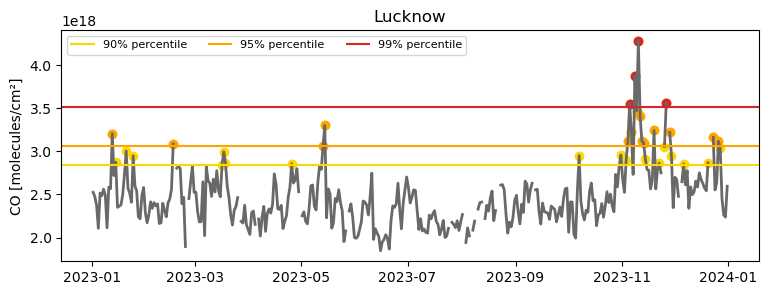

In [66]:
fig = plt.figure(figsize=(9,3))
ax = plt.axes()
ax.plot(timeseries_lucknow.time, timeseries_lucknow.CO, 'dimgray')

ax.axhline(y=y_lucknow90, color='gold', label='90% percentile')
ax.scatter(ts_lucknow90.index, ts_lucknow90, color='gold')

ax.axhline(y=y_lucknow95, color='orange', label='95% percentile')
ax.scatter(ts_lucknow95.index, ts_lucknow95, color='orange')

ax.axhline(y=y_lucknow99, color='tab:red', label='99% percentile')
ax.scatter(ts_lucknow99.index, ts_lucknow99, color='tab:red')
ax.set_ylabel('CO [molecules/cm²]')
ax.set_title('Lucknow')
ax.legend(loc='upper left', fontsize=8, ncol=3)
plt.show()

The date on which the maximum CO level is reached in each city is displayed below. 

In [60]:
print('Lahore: ', df_lahore.index[np.argmax(df_lahore)])
print('New Delhi: ', df_newdelhi.index[np.argmax(df_newdelhi)])
print('Lucknow: ', df_lucknow.index[np.argmax(df_lucknow)])

Lahore:  2023-11-07 12:00:00
New Delhi:  2023-11-04 12:00:00
Lucknow:  2023-11-10 12:00:00


The number of days above each percentile is given below. 

In [64]:
# Number of days in 2023 with CO concentration measured by TROPOMI
nb_days_newdelhi = len(df_newdelhi)
nb_days_lahore = len(df_lahore)
nb_days_lucknow = len(df_lucknow)

# Number of days in 2023 above 90%
nb_days_newdelhi_90 = len(ts_newdelhi90)
nb_days_lahore_90 = len(ts_lahore90)
nb_days_lucknow_90 = len(ts_lucknow90)

# Number of days in 2023 above 95%
nb_days_newdelhi_95 = len(ts_newdelhi95)
nb_days_lahore_95 = len(ts_lahore95)
nb_days_lucknow_95 = len(ts_lucknow95)

# Number of days in 2023 above 99%
nb_days_newdelhi_99 = len(ts_newdelhi99)
nb_days_lahore_99 = len(ts_lahore99)
nb_days_lucknow_99 = len(ts_lucknow99)

df_results = pd.DataFrame({'Total number of days with CO' : [nb_days_lahore , nb_days_newdelhi, nb_days_lucknow], 
                           'Number of days above 90%' : [nb_days_lahore_90, nb_days_newdelhi_90, nb_days_lucknow_90], 
                           'Number of days above 95%' : [nb_days_lahore_95, nb_days_newdelhi_95, nb_days_lucknow_95], 
                           'Number of days above 99%' : [nb_days_lahore_99, nb_days_newdelhi_99, nb_days_lucknow_99],
                          'Max. CO date' : [df_lahore.index[np.argmax(df_lahore)], df_newdelhi.index[np.argmax(df_newdelhi)], df_lucknow.index[np.argmax(df_lucknow)]]},
                          index=['Lahore', 'New Delhi', 'Lucknow'])
df_results

,Total number of days with CO,Number of days above 90%,Number of days above 95%,Number of days above 99%,Max. CO date
Lahore,340,34,17,4,2023-11-07 12:00:00
New Delhi,341,34,17,4,2023-11-04 12:00:00
Lucknow,346,35,18,4,2023-11-10 12:00:00


The number of days above 90%, 95%, and 99% seems to be almost the same, indicating there may be a correlation between the extreme pollution events in the 3 cities.
Furthermore, October and November 2023 appear to have very high CO concentrations for several days, in the 3 cities. 

## Carbon monoxide daily maps from 2023-10-01 to 2023-11-30

Let's visualize the extreme air pollution episode of October-November 2023 by plotting CO concentration maps. 

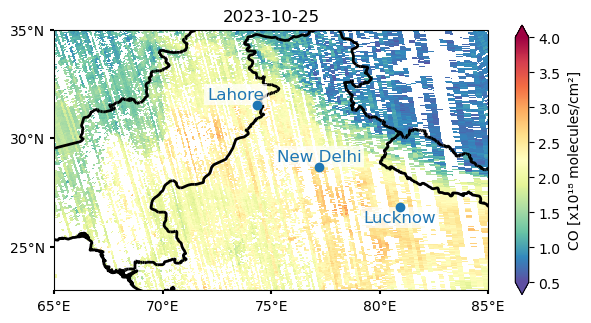

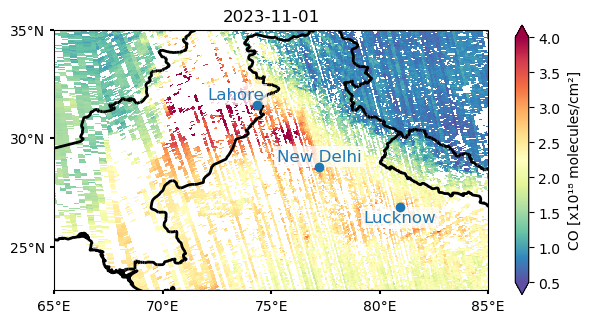

In [57]:
for MONTH, NB_DAYS in zip([10,11],[31,30]) : 
    
    for DAY in range(1, NB_DAYS+1) : 
        
        # We select the day and we convert CO concentrations in molecules/cm²
        CO_molec = dataset.CO.sel(time=f'2023-{MONTH:02d}-{DAY:02d}T12:00:00', method='nearest')*Avogadro*1e-4 
        
        longitudes, latitudes = np.meshgrid(dataset.lon.values, dataset.lat.values)

        fig = plt.figure(figsize=(7,7))
        axes = plt.axes(projection=ccrs.PlateCarree())
        axes.coastlines(lw=2)
        axes.add_feature(cf.BORDERS, lw=2, edgecolor='black')
        img1 = axes.pcolormesh(longitudes, latitudes, CO_molec*1e-18, 
                            vmin=0.5, vmax=4,  
                            transform=ccrs.PlateCarree(),
                            cmap='Spectral_r')
        
        # Let's plot the cities
        axes.plot(lon_newdelhi, lat_newdelhi, 'o', color='tab:blue', zorder=10)
        axes.plot(lon_lahore, lat_lahore, 'o', color='tab:blue', zorder=10)
        axes.plot(lon_lucknow, lat_lucknow, 'o', color='tab:blue', zorder=10)
        
        axes.set_xticks(np.arange(-180,181,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axes.xaxis.set_major_formatter(lon_formatter)
        axes.set_yticks(np.arange(-90,91,5), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axes.yaxis.set_major_formatter(lat_formatter)
        axes.xaxis.set_tick_params(width=1.5, length=3, labelsize=10)
        axes.yaxis.set_tick_params(width=1.5, length=3, labelsize=10)
        axes.set_xlim(x1, x2)
        axes.set_ylim(y1, y2)

        cbar1 = fig.colorbar(img1, orientation='vertical',
                              ticks=np.arange(0.5,4.5,0.5), shrink=0.5)
        cbar1.set_label('CO [x10¹⁸ molecules/cm²]', fontsize=10, labelpad=5)
        cbar1.ax.tick_params(labelsize=10)
        axes.set_title(f'2023-{MONTH:02d}-{DAY:02d}')
        
        plt.savefig(f'/extra/team RMSH/CO_daily_maps/2023-{MONTH:02d}-{DAY:02d}_COmap.png', dpi=300, bbox_inches='tight') 
        
        if MONTH==10 and DAY==25 : 
            props=dict(facecolor='white', edgecolor='None', pad=2, alpha=0.75)
            plt.text(lon_newdelhi, lat_newdelhi+0.5, "New Delhi", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
            plt.text(lon_lahore-1, lat_lahore+0.5, "Lahore", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
            plt.text(lon_lucknow, lat_lucknow-0.5, "Lucknow", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
            plt.show()   
        elif MONTH==11 and DAY==1 : 
            props=dict(facecolor='white', edgecolor='None', pad=2, alpha=0.75)
            plt.text(lon_newdelhi, lat_newdelhi+0.5, "New Delhi", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
            plt.text(lon_lahore-1, lat_lahore+0.5, "Lahore", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
            plt.text(lon_lucknow, lat_lucknow-0.5, "Lucknow", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
            plt.show()
        else : 
            plt.close()

Very high concentrations of CO are observed at the end of October. These spontaneous CO emissions can be explained by the presence of fires next to Lahore, New Delhi and Lucknow. 

## Maps of Active Fires from VIIRS/SNPP data

Let's make maps of Active Fires detected by VIIRS (SNPP). This product gives us an idea of the location of the fires at 1:30 pm (SNPP overpass time), but it does not tell us whether the fires lasted long or not.

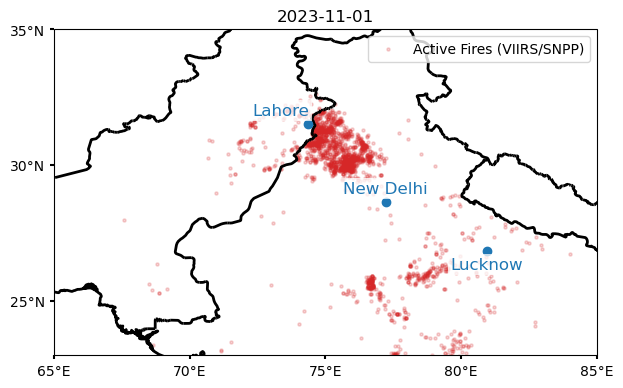

In [35]:
# Convert string to datetime
beg_date = np.datetime64('2023-11-01')
end_date = np.datetime64('2023-11-01')

current_date = beg_date.copy()
while current_date <= end_date:
    df_day = df_viirs[df_viirs['acq_date'] == f'{current_date}']  # select 1 day
    # Get the coordinates of fires detected by VIIRS/SNPP
    lats = df_day['latitude'].values
    lons = df_day['longitude'].values

    # Plot the fires
    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot(projection=ccrs.PlateCarree())
    ax.scatter(lons, lats, s=5, color='tab:red', alpha=0.2, label='Active Fires (VIIRS/SNPP)')
    # Plot the cities
    plt.plot(lon_newdelhi, lat_newdelhi, 'o', color='tab:blue')
    plt.plot(lon_lahore, lat_lahore, 'o', color='tab:blue')
    plt.plot(lon_lucknow, lat_lucknow, 'o', color='tab:blue')
    
    ax.coastlines(lw=2)
    ax.add_feature(cf.BORDERS, lw=2)
    ax.set_xticks(np.arange(-180, 181, 5), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.set_yticks(np.arange(-90, 91, 5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.xaxis.set_tick_params(width=1.5, length=3, labelsize=10)
    ax.yaxis.set_tick_params(width=1.5, length=3, labelsize=10)
    ax.set_title(f'{current_date}')
    ax.legend(loc='upper right')
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)
    
    # Save the plots 
    filename = "/extra/team RMSH/VIIRS_ActiveFires_plots/"+str(current_date)+"_fire_map.png"
    #plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Let's print the fire map for 2023-11-01 as example. We also add the name of the cities.
    if str(current_date) == '2023-11-01': 
        props=dict(facecolor='white', edgecolor='None', pad=2, alpha=0.75)
        plt.text(lon_newdelhi, lat_newdelhi+0.5, "New Delhi", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
        plt.text(lon_lahore-1, lat_lahore+0.5, "Lahore", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
        plt.text(lon_lucknow, lat_lucknow-0.5, "Lucknow", fontsize=12, ha='center', va='center', color='tab:blue', bbox=props)
        plt.show()
    else : 
        plt.close()
    
    current_date += np.timedelta64(1, 'D')
    

We can see that most of the fires detected by VIIRS are located near New Delhi and Lahore. Indeed, at this time of year, local farmers burn agricultural waste in preparation for the next harvest [ref].


But how can we explain the CO peak of 2023/11/07 in Lucknow? To do so, we can study wind direction to see if the CO was transported from the location of the fires. 

## Daily wind maps from ERA5 reanalysis

We need first to convert ERA5 time to local time (UTC+05). We define a function for this. 

In [38]:
utc_timezone = pytz.utc
roi_timezone = pytz.timezone('Asia/Karachi') 

def convert_to_localtime(time):
    time_utc = pd.to_datetime(time)
    time_ist = time_utc.tz_localize('UTC').tz_convert(roi_timezone).replace(tzinfo=None)
    return time_ist


dataset_winds['time'] = xr.apply_ufunc(convert_to_localtime, dataset_winds['time'], vectorize=True)
dataset_winds.time.values

array(['2023-10-01T05:00:00.000000000', '2023-10-01T06:00:00.000000000',
       '2023-10-01T07:00:00.000000000', ...,
       '2023-12-01T02:00:00.000000000', '2023-12-01T03:00:00.000000000',
       '2023-12-01T04:00:00.000000000'], dtype='datetime64[ns]')

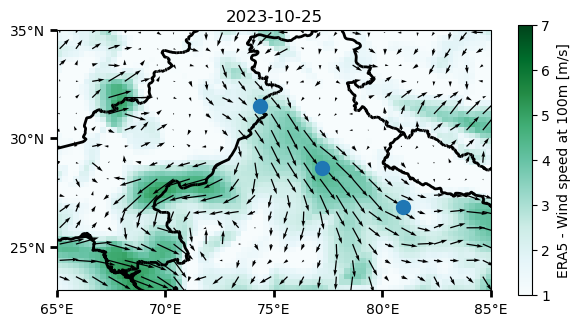

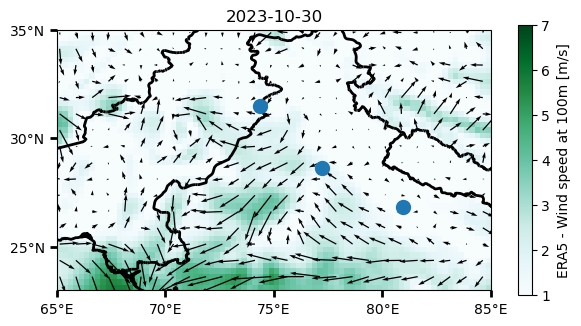

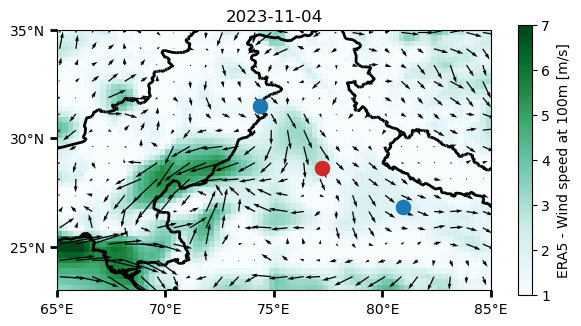

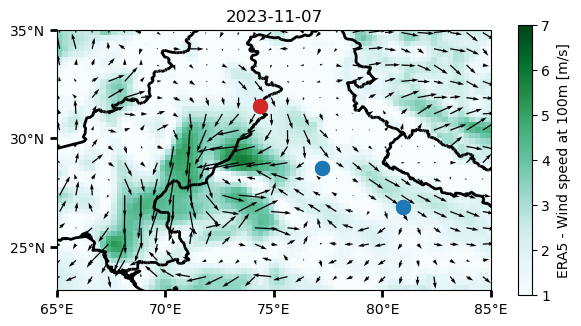

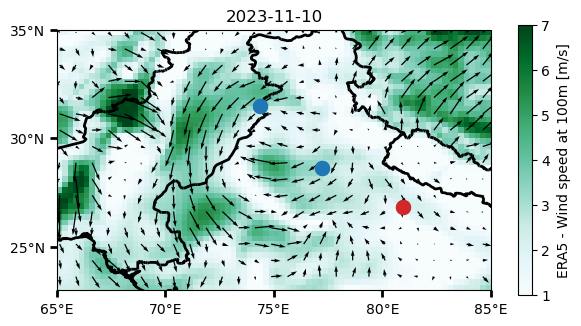

In [49]:
YEAR = 2023
step=3 # We want to plot winds arrow every 3 values

for MONTH, NB_DAYS in zip([10,11], [31,30]) : 
    for DAY in range(1, NB_DAYS+1) : 
        # Load u and v at 100m for 1 day
        winds_day = dataset_winds.sel(time=f'{YEAR}-{MONTH:02d}-{DAY:02d}')
        u100 = winds_day.u100.values
        v100 = winds_day.v100.values

        # Averaging the winds over the day and computing the wind speed
        u_mean = np.nanmean(u100, axis=0)
        v_mean = np.nanmean(v100, axis=0)
        ws_mean = np.sqrt(u_mean**2+v_mean**2)
        lats_winds = winds_day.lat.values
        lons_winds = winds_day.lon.values

        fig = plt.figure(figsize=(7,7))
        ax = plt.subplot(projection=ccrs.PlateCarree())
        ax.coastlines(lw=2)
        ax.add_feature(cf.BORDERS, lw=2)
        img = ax.pcolormesh(lons_winds, lats_winds, ws_mean, vmin=1, vmax=7, cmap='BuGn') # wind speed map
        ax.quiver(lons_winds[::step], lats_winds[::step], u_mean[::step, ::step], v_mean[::step, ::step], zorder=2, color='black') # wind direction
        ax.scatter([lon_newdelhi], [lat_newdelhi], s=100, color='tab:blue', zorder=10)
        ax.scatter([lon_lahore], [lat_lahore], s=100, color='tab:blue', zorder=10)
        ax.scatter([lon_lucknow], [lat_lucknow], s=100, color='tab:blue', zorder=10)

        ax.set_xticks(np.arange(-180,181,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.set_yticks(np.arange(-90,91,5), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)
        ax.xaxis.set_tick_params(width=2, length=5, labelsize=10)
        ax.yaxis.set_tick_params(width=2, length=5, labelsize=10)
        ax.set_xlim(lonlim_area[0], lonlim_area[1])
        ax.set_ylim(latlim_area[0], latlim_area[1])
        ax.set_title(f'{YEAR}{MONTH:02d}{DAY:02d}')

        cbar1 = fig.colorbar(img, orientation='vertical',
                              ticks=np.arange(1,8,1), shrink=0.5)
        cbar1.set_label('ERA5 - Wind speed at 100m [m/s]', fontsize=10, labelpad=5)
        cbar1.ax.tick_params(labelsize=10)
        ax.set_title(f'{YEAR}-{MONTH:02d}-{DAY:02d}')

        plt.savefig(f'/extra/team RMSH/ERA5_plots/{YEAR}-{MONTH:02d}-{DAY:02d}_windsmap.png', dpi=300, bbox_inches='tight') 
        
        if DAY==25 and MONTH==10 : 
            plt.show()
        
        elif DAY==30 and MONTH==10 : 
            plt.show()

        elif DAY==4 and MONTH==11 : 
            ax.scatter([lon_newdelhi], [lat_newdelhi], s=100, color='tab:red', zorder=10)
            ax.scatter([lon_lahore], [lat_lahore], s=100, color='tab:blue', zorder=10)
            ax.scatter([lon_lucknow], [lat_lucknow], s=100, color='tab:blue', zorder=10)
            plt.show()
        elif DAY==7 and MONTH==11 : 
            ax.scatter([lon_newdelhi], [lat_newdelhi], s=100, color='tab:blue', zorder=10)
            ax.scatter([lon_lahore], [lat_lahore], s=100, color='tab:red', zorder=10)
            ax.scatter([lon_lucknow], [lat_lucknow], s=100, color='tab:blue', zorder=10)
            plt.show()
        elif DAY==10 and MONTH==11 : 
            ax.scatter([lon_newdelhi], [lat_newdelhi], s=100, color='tab:blue', zorder=10)
            ax.scatter([lon_lahore], [lat_lahore], s=100, color='tab:blue', zorder=10)
            ax.scatter([lon_lucknow], [lat_lucknow], s=100, color='tab:red', zorder=10)
            plt.show()
        else : 
            plt.close()

Along the Himalayas, winds blow south-easterly for most of October. At the end of October, winds are very stable (i.e. very low wind speeds), which favors the accumulation of CO emitted by agricultural waste burning. CO is then transported along the Himalayas, explaining why Lucknow sees a late peak in CO maximum (2023/11/10) compared to Lahore or New Delhi. In the case of Lahore, the maximum of CO is detected on 2023/11/07, as the winds are oriented towards the west. 

<div class="alert alert-success" role="alert">

## SUBMIT YOUR RESULTS!
---------------------
Submit final version of your notebook in team-shared folder within DeepESDL Jupyter Lab! 
</div>

<br>

<span style='color:Red'>Please note the submission deadline is <b>1st March 2024! </b></span> 
